<h1>OEEU's GraphQL vs. REST APIs: performance tests</h1>

<h3>Importing modules for the tests</h3>

In [1]:
%autosave 0
import requests
import time
from timeit import default_timer as timer
import grequests
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import json

Autosave disabled


<h3>Declaration of the REST endpoints to test</h3><br>
<b>url_dash_lg</b> contains all the URLs that the "Job Searching Methods" dashboard (large dashboard) needs to populate its visualizations<br>
<b>url_dash_sm</b> contains all the URLs that the "Language Skills" dashboard (small dashboard) needs to populate its visualizations

In [2]:
with open("tokenOEEU.txt") as file: 
    api_token = file.read() 
    
with open("codeOEEU.txt") as file: 
    api_code = file.read() 

In [3]:
urls_dash_lg = [
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/metodos-busqueda-ultimo-empleo/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-contactos-personales-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-portales-empleo-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-contacto-directo-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-servicios-publicos-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-webs-corporativas-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-rrss-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-servicios-universitarios-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-ett-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-empresas-seleccion-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-anuncios-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-colegios-profesionales-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-sindicatos-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/utilizacion-asociaciones-exalumnos-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/metodos-efectivos-obtencion-ultimo-empleo/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-contactos-personales-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-portales-empleo-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-contacto-directo-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-servicios-publicos-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-webs-corporativas-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-rrss-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-servicios-universitarios-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-ett-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-empresas-seleccion-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-anuncios-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-colegios-profesionales-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-sindicatos-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-asociaciones-exalumnos-ultimo-empleo-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/influencia-metodos-busqueda-ultimo-empleo/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/efectividad-metodos-busqueda-ultimo-empleo/'
]

urls_dash_sm = [
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/nivel-medio-ingles-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/nivel-medio-frances-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/nivel-medio-aleman-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/nivel-medio-chino-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/nivel-medio-italiano-ramas/',
    'http://127.0.0.1:8000/api/grado/'+api_code+'/estadisticas/nivel-medio-portugues-ramas/',
]

<h2>Test of the requests' response times</h2>

<h3>Data requests simulation through sequential REST calls</h3>
<h4>Large dashboard</h4>

In [4]:
times_REST_lg = []
for i in range(0,100):
    total = 0
    for u in urls_dash_lg:
        start = timer()
        requests.get(u, headers={'Authorization': api_token})
        end = timer()
        total += end-start
    times_REST_lg.append(total) 

times_REST_lg

[2.1177480220794678,
 1.8922879695892334,
 1.92108154296875,
 1.8971009254455566,
 1.888214349746704,
 1.8776280879974365,
 1.8594014644622803,
 1.9326720237731934,
 1.8992280960083008,
 1.8766651153564453,
 1.8800628185272217,
 1.9001030921936035,
 1.8766329288482666,
 1.8733208179473877,
 1.886348009109497,
 1.9316880702972412,
 1.8748815059661865,
 1.8884809017181396,
 1.8804903030395508,
 1.8732619285583496,
 1.8832430839538574,
 1.8732917308807373,
 1.8739888668060303,
 1.8961501121520996,
 1.8985276222229004,
 1.8823473453521729,
 1.8744416236877441,
 1.8806703090667725,
 1.8795318603515625,
 1.863065481185913,
 1.8757023811340332,
 1.8870558738708496,
 1.8661682605743408,
 1.898000717163086,
 1.8944528102874756,
 1.8954267501831055,
 1.8968191146850586,
 1.930800199508667,
 1.8910133838653564,
 1.8847401142120361,
 1.9003896713256836,
 1.9029498100280762,
 1.8828496932983398,
 1.9017512798309326,
 1.8946149349212646,
 1.8688123226165771,
 1.8905737400054932,
 1.8778631687164307,

<h3>Data requests simulation through sequential REST calls</h3>
<h4>Small dashboard</h4>

In [5]:
times_REST_sm = []
for i in range(0,100):
    total = 0
    for u in urls_dash_sm:
        start = timer()
        requests.get(u, headers={'Authorization': api_token})
        end = timer()
        total += end-start
    times_REST_sm.append(total)
    
times_REST_sm

[0.378617525100708,
 0.4072279930114746,
 0.3187689781188965,
 0.3248438835144043,
 0.3015880584716797,
 0.3763413429260254,
 0.3077433109283447,
 0.30032825469970703,
 0.30787181854248047,
 0.32001757621765137,
 0.30346107482910156,
 0.32404184341430664,
 0.313051700592041,
 0.32232022285461426,
 0.3199336528778076,
 0.3056762218475342,
 0.31169605255126953,
 0.3071870803833008,
 0.3198356628417969,
 0.32320499420166016,
 0.2992730140686035,
 0.32398343086242676,
 0.30542707443237305,
 0.30368924140930176,
 0.3058750629425049,
 0.303128719329834,
 0.3000047206878662,
 0.30129313468933105,
 0.31159424781799316,
 0.32443928718566895,
 0.3196284770965576,
 0.31616640090942383,
 0.3035149574279785,
 0.2983124256134033,
 0.3188033103942871,
 0.3017308712005615,
 0.2966959476470947,
 0.30349230766296387,
 0.3036816120147705,
 0.321868896484375,
 0.31468701362609863,
 0.32253599166870117,
 0.3112475872039795,
 0.3069298267364502,
 0.31709885597229004,
 0.3064842224121094,
 0.3040852546691894

<h3>Data requests simulation through paralell REST calls</h3>
<h4>Large dashboard</h4>

In [6]:
times_REST_lg_conc = []
for i in range(0,100):
    rs = (grequests.get(u, headers={'Authorization': api_token}) for u in urls_dash_lg)
    start = timer()
    resps = grequests.map(rs)
    end = timer()
    times_REST_lg_conc.append(end - start) 
    
times_REST_lg_conc

[1.4263792037963867,
 1.337110996246338,
 1.3837430477142334,
 1.5523850917816162,
 1.1361961364746094,
 1.1906330585479736,
 1.4205679893493652,
 1.4227869510650635,
 1.1728460788726807,
 0.9885399341583252,
 1.4143681526184082,
 1.320343017578125,
 1.2865381240844727,
 1.2351861000061035,
 1.1023850440979004,
 1.3467051982879639,
 1.3964180946350098,
 1.425110101699829,
 1.63649320602417,
 1.2659859657287598,
 1.4869678020477295,
 1.0854041576385498,
 1.524278163909912,
 1.2091469764709473,
 1.099229097366333,
 1.6214308738708496,
 1.4587979316711426,
 1.140239953994751,
 1.005059003829956,
 1.4067330360412598,
 1.3029520511627197,
 1.198850154876709,
 1.436568021774292,
 1.4003829956054688,
 1.4830799102783203,
 1.1735141277313232,
 1.3545498847961426,
 1.4977850914001465,
 1.1728498935699463,
 1.3826658725738525,
 1.4486229419708252,
 1.3238120079040527,
 1.0158181190490723,
 1.4511990547180176,
 1.2864220142364502,
 1.1028480529785156,
 1.4338428974151611,
 1.5289320945739746,
 1.

<h3>Data requests simulation through paralell REST calls</h3>
<h4>Small dashboard</h4>

In [7]:
times_REST_sm_conc = []
for i in range(0,100):
    rs = (grequests.get(u, headers={'Authorization': api_token}) for u in urls_dash_sm)
    start = timer()
    resps = grequests.map(rs)
    end = timer()
    times_REST_sm_conc.append(end - start) 

times_REST_sm_conc

[0.2398998737335205,
 0.23278307914733887,
 0.3596770763397217,
 0.2189328670501709,
 0.21460485458374023,
 0.2622721195220947,
 0.34372520446777344,
 0.28243303298950195,
 0.3243858814239502,
 0.22634196281433105,
 0.21933484077453613,
 0.2669811248779297,
 0.2270979881286621,
 0.22756409645080566,
 0.22307205200195312,
 0.22575688362121582,
 0.23213601112365723,
 0.32791614532470703,
 0.21305418014526367,
 0.24030518531799316,
 0.2202742099761963,
 0.2308499813079834,
 0.27831506729125977,
 0.2098550796508789,
 0.2543039321899414,
 0.2581760883331299,
 0.2767009735107422,
 0.25574779510498047,
 0.29570794105529785,
 0.23316597938537598,
 0.22628998756408691,
 0.2450261116027832,
 0.2195417881011963,
 0.22884607315063477,
 0.22182583808898926,
 0.21976208686828613,
 0.22451281547546387,
 0.2294008731842041,
 0.21783995628356934,
 0.23120594024658203,
 0.23500919342041016,
 0.19945716857910156,
 0.23976612091064453,
 0.2928340435028076,
 0.23012185096740723,
 0.22541093826293945,
 0.22

<h3>Data request simulation through a GraphQL call</h3>
<h4>Large dashboard</h4>

In [8]:
headers = {'content-type': 'application/json'}
query_lg = json.dumps({"query": "{ estadisticasGrado { jobSearchMethodsStats { jobSearchMethodsUsed(RUCTCode: "+api_code+") { personalContacts employmentWebs selfPresentation publicEmploymentServices corporateWebs socialNetworks universityEmploymentServices temporaryEmploymentAgencies personnelSelectionAgencies pressAdvertisements professionalBodies unions formerStudentsAssociations } jobSearchKeyMethods(RUCTCode: "+api_code+") { personalContacts employmentWebs selfPresentation publicEmploymentServices corporateWebs socialNetworks universityEmploymentServices temporaryEmploymentAgencies personnelSelectionAgencies pressAdvertisements professionalBodies unions formerStudentsAssociations } jobSearchMethodsEffectiveness(RUCTCode: "+api_code+") { personalContacts employmentWebs selfPresentation publicEmploymentServices corporateWebs socialNetworks universityEmploymentServices temporaryEmploymentAgencies personnelSelectionAgencies pressAdvertisements professionalBodies unions formerStudentsAssociations }, jobSearchMethodsInfluence(RUCTCode: "+api_code+") { personalContacts { jobObtained jobNotObtained } employmentWebs { jobObtained jobNotObtained } selfPresentation { jobObtained jobNotObtained } publicEmploymentServices { jobObtained jobNotObtained } corporateWebs { jobObtained jobNotObtained } socialNetworks { jobObtained jobNotObtained } universityEmploymentServices { jobObtained jobNotObtained } temporaryEmploymentAgencies { jobObtained jobNotObtained } personnelSelectionAgencies { jobObtained jobNotObtained } pressAdvertisements { jobObtained jobNotObtained } professionalBodies { jobObtained jobNotObtained } unions { jobObtained jobNotObtained } formerStudentsAssociations { jobObtained jobNotObtained } }, branchesPersonalContactsUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesEmploymentWebsUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesSelfPresentationUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesPublicEmploymentServicesUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesCorporateWebsUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesSocialNetworksUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesUniversityEmploymentServicesUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesTemporaryEmploymentAgenciesUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesPressAdvertisementsUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesPersonnelSelectionAgenciesUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesProfessionalBodiesUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesUnionsUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesFormerStudentsAssociationsUse(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesPersonalContactsEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesEmploymentWebsEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesSelfPresentationEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesPublicEmploymentServicesEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesCorporateWebsEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesSocialNetworksEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesUniversityEmploymentServicesEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesTemporaryEmploymentAgenciesEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesPressAdvertisementsEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesPersonnelSelectionAgenciesEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesProfessionalBodiesEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesUnionsEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, branchesFormerStudentsAssociationsEffectiveness(RUCTCode: "+api_code+") { artsHumanities sciences healthSciences engineeringArchitecture socialLegalSciences }, }} }"})

times_graph_lg = []
for i in range(0,100):
    start = timer()
    r = requests.post('http://127.0.0.1:8000/api/graphql', headers=headers, data=query_lg)
    end = timer()
    times_graph_lg.append(end - start) 

times_graph_lg

[1.840946912765503,
 1.6862199306488037,
 1.6626770496368408,
 1.6919848918914795,
 1.6843430995941162,
 1.764794111251831,
 1.6935529708862305,
 1.6842129230499268,
 1.6541590690612793,
 1.6679039001464844,
 1.721695899963379,
 1.744574785232544,
 1.6880168914794922,
 1.684648036956787,
 1.7023930549621582,
 1.6849370002746582,
 1.718338966369629,
 1.6832249164581299,
 1.7129600048065186,
 1.6991620063781738,
 1.693368911743164,
 1.6648988723754883,
 1.6837480068206787,
 1.7424631118774414,
 1.6743369102478027,
 1.6629979610443115,
 1.6588640213012695,
 1.7765119075775146,
 1.7594900131225586,
 1.7333729267120361,
 1.6962389945983887,
 1.6572299003601074,
 1.6649391651153564,
 1.6716439723968506,
 1.7000789642333984,
 1.7583839893341064,
 1.7266528606414795,
 1.7063820362091064,
 1.7233140468597412,
 1.6477630138397217,
 1.6435301303863525,
 1.679211139678955,
 1.7038910388946533,
 1.6845369338989258,
 1.6731929779052734,
 1.6599171161651611,
 1.6778109073638916,
 1.7250030040740967,


<h3>Data request simulation through a GraphQL call</h3>
<h4>Small dashboard</h4>

In [9]:
query_sm = json.dumps({"query": "{ estadisticasGrado { languageSkillsStats { englishAverageSkills(RUCTCode: "+api_code+") { artsHumanities { comprehension writing conversation }, sciences { comprehension writing conversation }, healthSciences { comprehension writing conversation }, socialLegalSciences { comprehension writing conversation }, engineeringArchitecture { comprehension writing conversation }, total { comprehension writing conversation } }, frenchAverageSkills(RUCTCode: "+api_code+") { artsHumanities { comprehension writing conversation }, sciences { comprehension writing conversation }, healthSciences { comprehension writing conversation }, socialLegalSciences { comprehension writing conversation }, engineeringArchitecture { comprehension writing conversation }, total { comprehension writing conversation } }, germanAverageSkills(RUCTCode: "+api_code+") { artsHumanities { comprehension writing conversation }, sciences { comprehension writing conversation }, healthSciences { comprehension writing conversation }, socialLegalSciences { comprehension writing conversation }, engineeringArchitecture { comprehension writing conversation }, total { comprehension writing conversation } }, italianAverageSkills(RUCTCode: "+api_code+") { artsHumanities { comprehension writing conversation }, sciences { comprehension writing conversation }, healthSciences { comprehension writing conversation }, socialLegalSciences { comprehension writing conversation }, engineeringArchitecture { comprehension writing conversation }, total { comprehension writing conversation } }, portugueseAverageSkills(RUCTCode: "+api_code+") { artsHumanities { comprehension writing conversation }, sciences { comprehension writing conversation }, healthSciences { comprehension writing conversation }, socialLegalSciences { comprehension writing conversation }, engineeringArchitecture { comprehension writing conversation }, total { comprehension writing conversation } }, mandarinChineseAverageSkills(RUCTCode: "+api_code+") { artsHumanities { comprehension writing conversation }, sciences { comprehension writing conversation }, healthSciences { comprehension writing conversation }, socialLegalSciences { comprehension writing conversation }, engineeringArchitecture { comprehension writing conversation }, total { comprehension writing conversation } }, } } }"})

times_graph_sm = []
for i in range(0,100):
    start = timer()
    r = requests.post('http://127.0.0.1:8000/api/graphql', headers=headers, data=query_sm)
    end = timer()
    times_graph_sm.append(end - start)
    
times_graph_sm

[0.34369993209838867,
 0.3945019245147705,
 0.36217308044433594,
 0.2999999523162842,
 0.2994270324707031,
 0.3001229763031006,
 0.2981071472167969,
 0.28698110580444336,
 0.29369211196899414,
 0.294295072555542,
 0.28530001640319824,
 0.29914021492004395,
 0.3060030937194824,
 0.29473209381103516,
 0.3508470058441162,
 0.2938711643218994,
 0.2880361080169678,
 0.2850990295410156,
 0.2985270023345947,
 0.3559238910675049,
 0.29735684394836426,
 0.2883169651031494,
 0.2935781478881836,
 0.291301965713501,
 0.287247896194458,
 0.2891960144042969,
 0.35247087478637695,
 0.28879380226135254,
 0.29810190200805664,
 0.2863278388977051,
 0.2970848083496094,
 0.2958409786224365,
 0.3026759624481201,
 0.29516005516052246,
 0.2912168502807617,
 0.2896599769592285,
 0.31568312644958496,
 0.2922220230102539,
 0.35770487785339355,
 0.2930021286010742,
 0.2901899814605713,
 0.2920360565185547,
 0.29379701614379883,
 0.2981250286102295,
 0.29059290885925293,
 0.2941551208496094,
 0.293532133102417,
 

<h2>Results</h2>

<h3>GraphQL vs. REST (Small Dashboard - Sequential REST calls)</h3>

In [10]:
print "GraphQL vs. REST (Small Dashboard - Sequential)\n"
graphSm = np.array(times_graph_sm)
restSm = np.array(times_REST_sm)

print "GraphQL average response time: " + str(graphSm.mean())
print "REST average response time: " + str(restSm.mean())

print "\nKosmogoroff-Smirnoff test on GraphQL response times: " + str(stats.kstest(times_graph_sm, 'norm'))
print "Kosmogoroff-Smirnoff test on REST response times: " + str(stats.kstest(times_REST_sm, 'norm'))
print "\nKruskal test: " + str(stats.kruskal(times_REST_sm, times_graph_sm))

GraphQL vs. REST (Small Dashboard - Sequential)

GraphQL average response time: 0.301537818909
REST average response time: 0.314007909298

Kosmogoroff-Smirnoff test on GraphQL response times: KstestResult(statistic=0.61200707305883661, pvalue=0.0)
Kosmogoroff-Smirnoff test on REST response times: KstestResult(statistic=0.61665067443996291, pvalue=0.0)

Kruskal test: KruskalResult(statistic=75.748322388059705, pvalue=3.2222474778924405e-18)


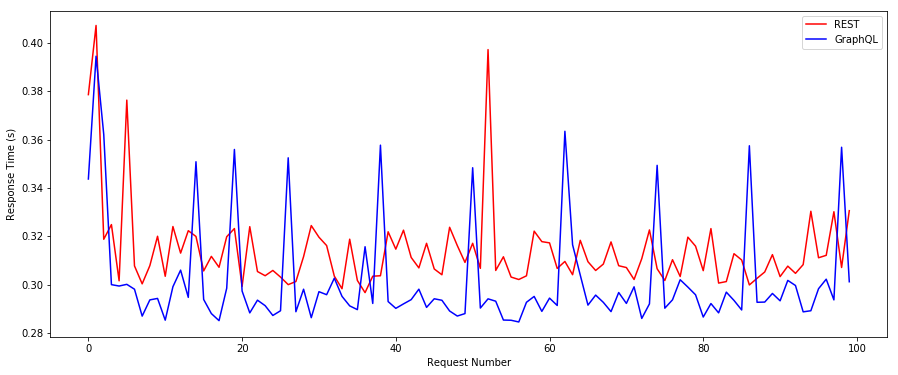

In [11]:
plt.figure(figsize=(15,6))
plt.plot(range(0,100), times_REST_sm, 'r', label="REST")
plt.plot(range(0,100), times_graph_sm, 'b', label="GraphQL")
plt.ylabel('Response Time (s)')
plt.xlabel('Request Number')
plt.legend()
plt.show()

<h3>GraphQL vs. REST (Small Dashboard - Concurrent REST calls)</h3>

In [12]:
print "GraphQL vs. REST (Small Dashboard - Concurrent)\n"
graphSm = np.array(times_graph_sm)
restSm = np.array(times_REST_sm_conc)

print "GraphQL average response time: " + str(graphSm.mean())
print "REST average response time: " + str(restSm.mean())

print "\nKosmogoroff-Smirnoff test on GraphQL response times: " + str(stats.kstest(times_graph_sm, 'norm'))
print "Kosmogoroff-Smirnoff test on REST response times: " + str(stats.kstest(times_REST_sm_conc, 'norm'))
print "\nKruskal test: " + str(stats.kruskal(times_REST_sm_conc, times_graph_sm))

GraphQL vs. REST (Small Dashboard - Concurrent)

GraphQL average response time: 0.301537818909
REST average response time: 0.236484670639

Kosmogoroff-Smirnoff test on GraphQL response times: KstestResult(statistic=0.61200707305883661, pvalue=0.0)
Kosmogoroff-Smirnoff test on REST response times: KstestResult(statistic=0.57904742766521222, pvalue=0.0)

Kruskal test: KruskalResult(statistic=117.79918805970158, pvalue=1.9186186144205164e-27)


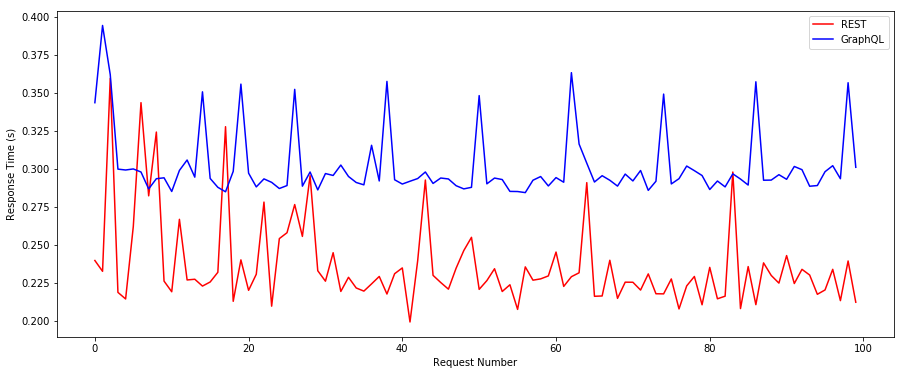

In [13]:
plt.figure(figsize=(15,6))
plt.plot(range(0,100), times_REST_sm_conc, 'r', label="REST")
plt.plot(range(0,100), times_graph_sm, 'b', label="GraphQL")
plt.ylabel('Response Time (s)')
plt.xlabel('Request Number')
plt.legend()
plt.show()

<h3>GraphQL vs. REST (Large Dashboard - Sequential REST calls)</h3>

In [14]:
print "GraphQL vs. REST (Large Dashboard - Sequential)\n"
graphLg = np.array(times_graph_lg)
restLg = np.array(times_REST_lg)

print "GraphQL average response time: " + str(graphLg.mean())
print "REST average response time: " + str(restLg.mean())

print "\nKosmogoroff-Smirnoff test on GraphQL response times: " + str(stats.kstest(times_graph_lg, 'norm'))
print "Kosmogoroff-Smirnoff test on REST response times: " + str(stats.kstest(times_REST_lg, 'norm'))
print "\nKruskal test: " + str(stats.kruskal(times_REST_lg, times_graph_lg))

GraphQL vs. REST (Large Dashboard - Sequential)

GraphQL average response time: 1.69444657326
REST average response time: 1.88700150013

Kosmogoroff-Smirnoff test on GraphQL response times: KstestResult(statistic=0.94946184917995324, pvalue=0.0)
Kosmogoroff-Smirnoff test on REST response times: KstestResult(statistic=0.96843343584302155, pvalue=0.0)

Kruskal test: KruskalResult(statistic=149.25373134328356, pvalue=2.5239394239903658e-34)


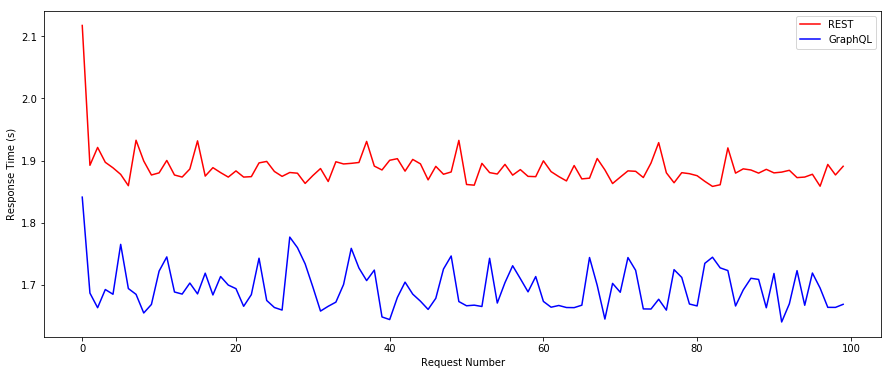

In [15]:
plt.figure(figsize=(15,6))
plt.plot(range(0,100), times_REST_lg, 'r', label="REST")
plt.plot(range(0,100), times_graph_lg, 'b', label="GraphQL")
plt.ylabel('Response Time (s)')
plt.xlabel('Request Number')
plt.legend()
plt.show()

<h3>GraphQL vs. REST (Large Dashboard - Concurrent REST calls)</h3>

In [16]:
print "GraphQL vs. REST (Large Dashboard - Concurrent)\n"
graphLg = np.array(times_graph_lg)
restLg = np.array(times_REST_lg_conc)

print "GraphQL average response time: " + str(graphLg.mean())
print "REST average response time: " + str(restLg.mean())

print "\nKosmogoroff-Smirnoff test on GraphQL response times: " + str(stats.kstest(times_graph_lg, 'norm'))
print "Kosmogoroff-Smirnoff test on REST response times: " + str(stats.kstest(times_REST_lg_conc, 'norm'))
print "\nKruskal test: " + str(stats.kruskal(times_REST_lg_conc, times_graph_lg))

GraphQL vs. REST (Large Dashboard - Concurrent)

GraphQL average response time: 1.69444657326
REST average response time: 1.31209793568

Kosmogoroff-Smirnoff test on GraphQL response times: KstestResult(statistic=0.94946184917995324, pvalue=0.0)
Kosmogoroff-Smirnoff test on REST response times: KstestResult(statistic=0.83855585659860821, pvalue=0.0)

Kruskal test: KruskalResult(statistic=149.25373134328356, pvalue=2.5239394239903658e-34)


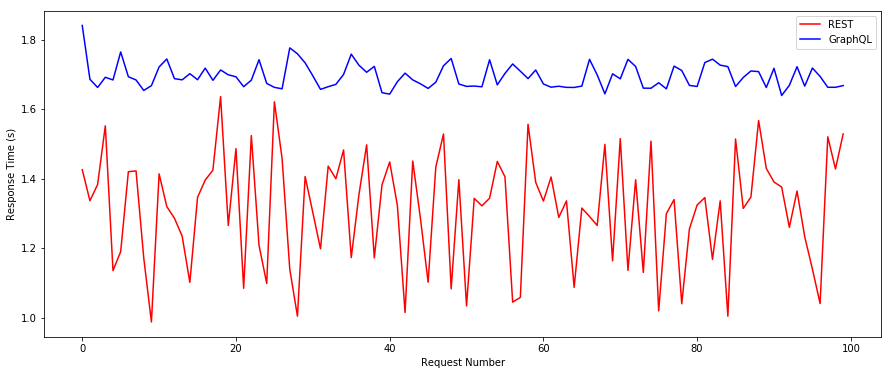

In [17]:
plt.figure(figsize=(15,6))
plt.plot(range(0,100), times_REST_lg_conc, 'r', label="REST")
plt.plot(range(0,100), times_graph_lg, 'b', label="GraphQL")
plt.ylabel('Response Time (s)')
plt.xlabel('Request Number')
plt.legend()
plt.show()

<h3>GraphQL vs. REST: responses' size</h3>

<h4>Large dashboard</h4>

In [18]:
total_size_REST_lg = 0
for u in urls_dash_lg:
    r = requests.get(u, headers={'Authorization': api_token})
    total_size_REST_lg += len(r.content)
print "Total size of REST responses: " + str(total_size_REST_lg) + " B"

Total size of REST responses: 10746 B


In [19]:
total_size_GraphQL_lg = 0
r = requests.post('http://127.0.0.1:8000/api/graphql', headers=headers, data=query_lg)
total_size_GraphQL_lg = len(r.content)
print "Total size of GraphQL response: " + str(total_size_GraphQL_lg) + " B"

Total size of GraphQL response: 6238 B


In [20]:
print "Improvement with GraphQL: " + str((total_size_REST_lg-total_size_GraphQL_lg)/float(total_size_REST_lg)*100) + "%"

Improvement with GraphQL: 41.9504932068%


<h4>Small dashboard</h4>

In [21]:
total_size_REST_sm = 0
for u in urls_dash_sm:
    r = requests.get(u, headers={'Authorization': api_token})
    total_size_REST_sm += len(r.content)
print "Total size of REST responses: " + str(total_size_REST_sm) + " B"

Total size of REST responses: 3426 B


In [22]:
total_size_GraphQL_sm = 0
r = requests.post('http://127.0.0.1:8000/api/graphql', headers=headers, data=query_sm)
total_size_GraphQL_sm = len(r.content)
print "Total size of GraphQL response: " + str(total_size_GraphQL_sm) + " B"

Total size of GraphQL response: 2892 B


In [23]:
print "Improvement with GraphQL: " + str((total_size_REST_sm-total_size_GraphQL_sm)/float(total_size_REST_sm)*100) + "%"

Improvement with GraphQL: 15.5866900175%
